## QuantUXR practice - chapter 5.7

Statistical practice part\
Ada Kim\
04.24.2024

In [98]:
# import basics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import additionals

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
# load dataset

dat1 = pd.read_csv("statistics-dat1.csv")
dat2 = pd.read_csv("statistics-dat2.csv")

In [15]:
# check the size of the data

print(dat1.shape)
print(dat2.shape)

(2000, 2)
(2000, 2)


In [16]:
# check the first few lows

print(dat1.head())
print(dat2.head())

         v1        v2
0  1.820477  3.940885
1  2.572529  4.722227
2 -0.877118 -0.398414
3 -0.670124  0.523942
4  1.690665  0.272683
         v1        v2
0  2.059154 -1.434435
1  0.750002 -0.245632
2  1.654007 -4.676168
3 -2.431307 -1.098460
4  0.837735 -0.509512


In [21]:
# check the null value

print(dat1.isnull().sum())
print(dat2.isnull().sum())

v1    0
v2    0
dtype: int64
v1    0
v2    0
dtype: int64


In [19]:
# check the statistical tendency

dat1.describe()

,v1,v2
count,2000.000000,2000.000000
mean,-0.017683,-0.035675
std,2.024525,2.012489
min,-5.881963,-6.650633
25%,-1.439461,-1.403458
50%,0.033637,-0.078565
75%,1.341547,1.349543
max,6.337519,6.870648


In [9]:
dat2.describe()

,v1,v2
count,2000.000000,2000.000000
mean,-0.012886,0.039718
std,1.996118,2.370907
min,-6.604218,-6.179630
25%,-1.427085,-1.900290
50%,0.035143,0.083116
75%,1.373675,1.993470
max,6.499826,6.130308


Text(0.5, 1.0, 'dat2')

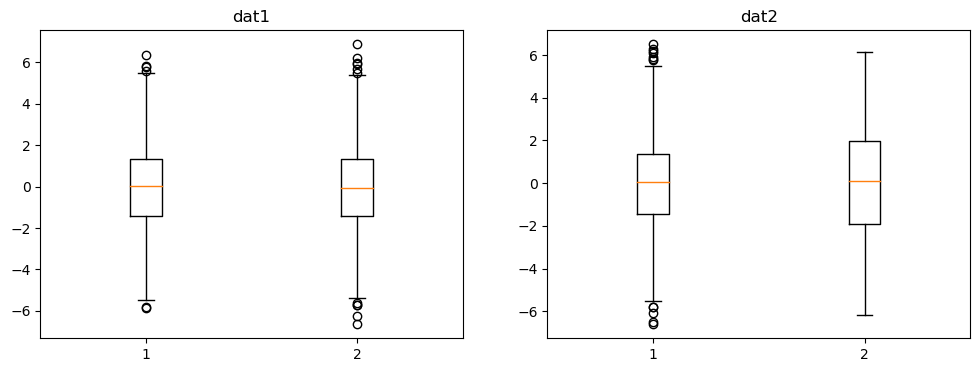

In [70]:
#boxplots

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].boxplot([dat1['v1'], dat1['v2']])
ax[0].set_title('dat1')

ax[1].boxplot([dat2['v1'], dat2['v2']])
ax[1].set_title('dat2')

Text(0.5, 1.0, 'v2 in dat2')

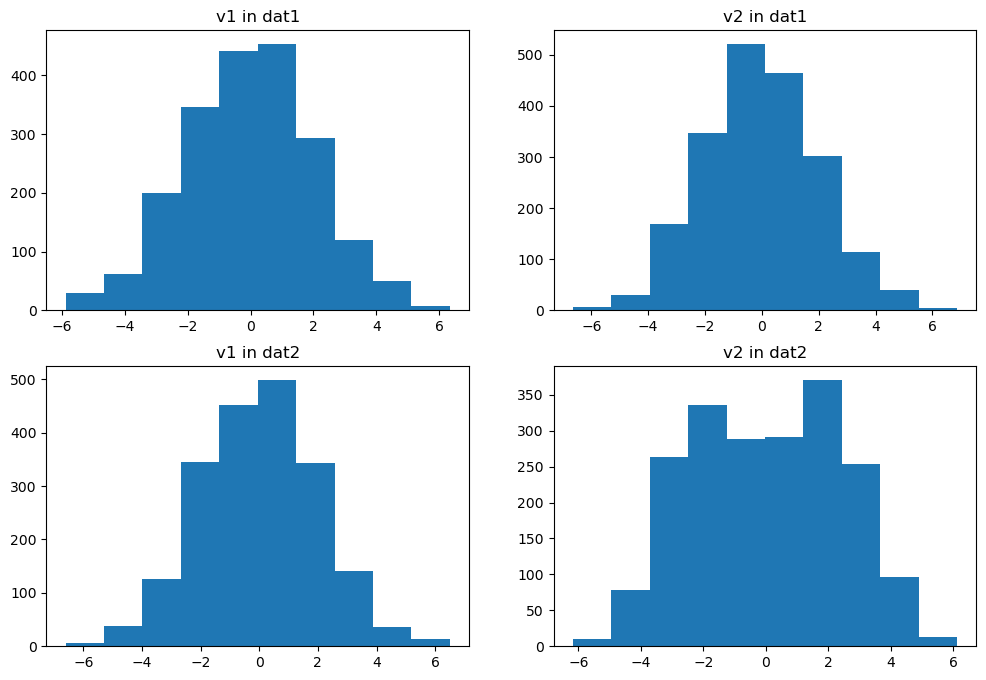

In [60]:
#Histograms

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0,0].hist(dat1['v1'])
ax[0,0].set_title('v1 in dat1')

ax[0,1].hist(dat1['v2'])
ax[0,1].set_title('v2 in dat1')

ax[1,0].hist(dat2['v1'])
ax[1,0].set_title('v1 in dat2')

ax[1,1].hist(dat2['v2'])
ax[1,1].set_title('v2 in dat2')

Text(0.5, 1.0, 'scatterplot for dat2')

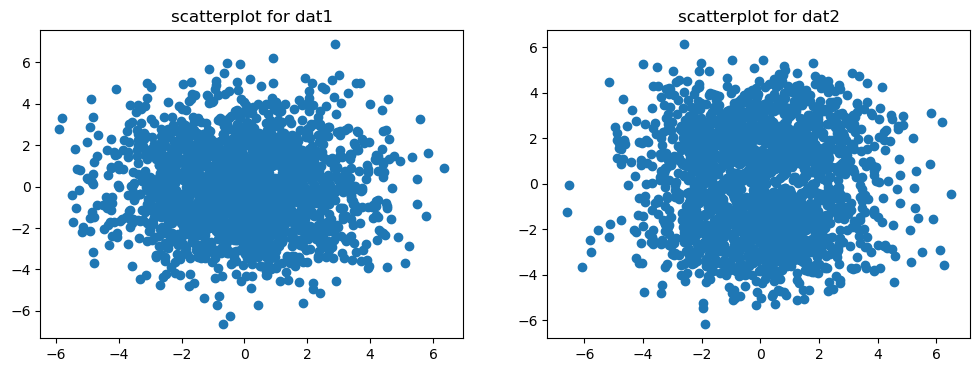

In [61]:
# scatterplots

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].scatter(dat1['v1'], dat1['v2'])
ax[0].set_title('scatterplot for dat1')

ax[1].scatter(dat2['v1'], dat2['v2'])
ax[1].set_title('scatterplot for dat2')

In [74]:
# t-test

t_dat1, p_dat1 = ttest_ind(dat1['v1'], dat1['v2'])
t_dat2, p_dat2 = ttest_ind(dat2['v1'], dat2['v2'])
print("t-score: ", t_dat1, "p-value: ", p_dat1)
print("t-score: ", t_dat2, "p-value: ", p_dat2)

t-score:  0.28186108625954037 p-value:  0.77806461726755
t-score:  -0.7590422380383209 p-value:  0.44787203798386155


In [102]:
# linear regression

model = LinearRegression()
X = dat1['v1'].values.reshape(-1, 1)
y = dat1['v2'].values
X2 = dat2['v1'].values.reshape(-1, 1)
y2 = dat2['v2'].values

model.fit(X, y)
print("Coefficients1:", model.coef_, model.intercept_)
model.fit(X2, y2)
print("Coefficients2:", model.coef_, model.intercept_)

Coefficients1: [-0.00461026] -0.035756120002335474
Coefficients2: [-0.01464347] 0.039529312848430635


In [101]:
results = sm.OLS(y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04298
Date:                Tue, 30 Apr 2024   Prob (F-statistic):              0.836
Time:                        00:39:12   Log-Likelihood:                -4236.1
No. Observations:                2000   AIC:                             8476.
Df Residuals:                    1998   BIC:                             8487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0358      0.045     -0.794      0.427      -0.124       0.053
x1            -0.0046      0.022     -0.207      0.836      -0.048       0.039
==============================================================================
Omnibus:                        5.566   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.620
Skew:                           0.120   Prob(JB):                       0.0602
Kurtosis:                       2.903   Cond. No.                         2.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""